In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("data/EMA_data.csv")
dataset.head()

,ID,beep_time_start,beep_time_end,mood_well,mood_down,mood_fright,mood_tense,phy_sleepy,phy_tired,mood_cheerf,...,mor_tired_phys,mor_tired_ment,eve_many_offs,eve_long_offs,eve_walk_well,eve_clothing,eve_eat_well,eve_personalcare,eve_household,eve_tired
0,110001,2018-08-28 09:09:11,2018-08-28 09:12:01,7,1,1,1,1,1,7.0,...,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
1,110001,2018-08-28 11:58:45,2018-08-28 12:00:09,7,1,1,1,1,1,7.0,...,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
2,110001,2018-08-28 13:51:10,2018-08-28 13:52:44,7,1,1,1,1,1,7.0,...,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
3,110001,2018-08-28 15:19:18,2018-08-28 15:20:50,7,1,1,1,1,1,7.0,...,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
4,110001,2018-08-28 17:53:12,2018-08-28 17:54:56,7,1,1,1,4,1,7.0,...,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1539 non-null   int64  
 1   beep_time_start   1539 non-null   object 
 2   beep_time_end     1539 non-null   object 
 3   mood_well         1539 non-null   int64  
 4   mood_down         1539 non-null   int64  
 5   mood_fright       1539 non-null   int64  
 6   mood_tense        1539 non-null   int64  
 7   phy_sleepy        1539 non-null   int64  
 8   phy_tired         1539 non-null   int64  
 9   mood_cheerf       1538 non-null   float64
 10  mood_relax        1538 non-null   float64
 11  thou_concent      1538 non-null   float64
 12  pat_hallu         1538 non-null   float64
 13  loc_where         1538 non-null   float64
 14  soc_who           1537 non-null   float64
 15  soc_who02         168 non-null    float64
 16  soc_who03         12 non-null     float64


In [4]:
dataset.columns

Index(['ID', 'beep_time_start', 'beep_time_end', 'mood_well', 'mood_down',
       'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired', 'mood_cheerf',
       'mood_relax', 'thou_concent', 'pat_hallu', 'loc_where', 'soc_who',
       'soc_who02', 'soc_who03', 'act_what', 'act_what02', 'act_what03',
       'act_problemless', 'mobility_well', 'sit_still', 'speech_well',
       'walk_well', 'tremor', 'slowness', 'stiffness', 'muscle_tension',
       'dyskinesia', 'sanpar_onoff', 'sanpar_medic', 'beep_disturb',
       'mor_sleptwell', 'mor_often_awake', 'mor_rested', 'mor_tired_phys',
       'mor_tired_ment', 'eve_many_offs', 'eve_long_offs', 'eve_walk_well',
       'eve_clothing', 'eve_eat_well', 'eve_personalcare', 'eve_household',
       'eve_tired'],
      dtype='object')

In [5]:
pd.set_option("display.max_columns", None)
dataset.head()

,ID,beep_time_start,beep_time_end,mood_well,mood_down,mood_fright,mood_tense,phy_sleepy,phy_tired,mood_cheerf,mood_relax,thou_concent,pat_hallu,loc_where,soc_who,soc_who02,soc_who03,act_what,act_what02,act_what03,act_problemless,mobility_well,sit_still,speech_well,walk_well,tremor,slowness,stiffness,muscle_tension,dyskinesia,sanpar_onoff,sanpar_medic,beep_disturb,mor_sleptwell,mor_often_awake,mor_rested,mor_tired_phys,mor_tired_ment,eve_many_offs,eve_long_offs,eve_walk_well,eve_clothing,eve_eat_well,eve_personalcare,eve_household,eve_tired
0,110001,2018-08-28 09:09:11,2018-08-28 09:12:01,7,1,1,1,1,1,7.0,7.0,7.0,1.0,10.0,0.0,NaN,NaN,89.0,NaN,NaN,7.0,4.0,7.0,7.0,4.0,1.0,5.0,5.0,4.0,1.0,3.0,1.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
1,110001,2018-08-28 11:58:45,2018-08-28 12:00:09,7,1,1,1,1,1,7.0,7.0,7.0,1.0,10.0,0.0,NaN,NaN,20.0,NaN,NaN,4.0,4.0,4.0,7.0,4.0,1.0,5.0,5.0,3.0,1.0,3.0,1.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
2,110001,2018-08-28 13:51:10,2018-08-28 13:52:44,7,1,1,1,1,1,7.0,7.0,7.0,1.0,55.0,0.0,NaN,NaN,89.0,NaN,NaN,7.0,4.0,6.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,3.0,2.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
3,110001,2018-08-28 15:19:18,2018-08-28 15:20:50,7,1,1,1,1,1,7.0,7.0,7.0,1.0,10.0,30.0,NaN,NaN,20.0,NaN,NaN,6.0,5.0,4.0,7.0,4.0,1.0,3.0,4.0,4.0,1.0,3.0,1.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0
4,110001,2018-08-28 17:53:12,2018-08-28 17:54:56,7,1,1,1,4,1,7.0,7.0,7.0,1.0,10.0,10.0,NaN,NaN,40.0,NaN,NaN,7.0,4.0,6.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,4.0,6.0,7.0,6.0,4.0,2.0


In [6]:
dataset.describe()

,ID,mood_well,mood_down,mood_fright,mood_tense,phy_sleepy,phy_tired,mood_cheerf,mood_relax,thou_concent,pat_hallu,loc_where,soc_who,soc_who02,soc_who03,act_what,act_what02,act_what03,act_problemless,mobility_well,sit_still,speech_well,walk_well,tremor,slowness,stiffness,muscle_tension,dyskinesia,sanpar_onoff,sanpar_medic,beep_disturb,mor_sleptwell,mor_often_awake,mor_rested,mor_tired_phys,mor_tired_ment,eve_many_offs,eve_long_offs,eve_walk_well,eve_clothing,eve_eat_well,eve_personalcare,eve_household,eve_tired
count,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1537.000000,168.000000,12.000000,1536.000000,77.000000,7.000000,1536.000000,1536.000000,1535.000000,1535.000000,1535.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1533.000000,1533.000000,1530.000000,1514.000000,1513.000000,1513.000000,1514.000000,1514.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,110011.087719,5.788174,1.629630,1.378168,1.729695,2.500325,2.935023,5.529259,5.475293,5.566970,1.071521,19.925228,13.296682,29.125000,39.166667,38.527344,54.194805,75.142857,5.861979,5.371745,5.444951,5.859935,5.200651,2.124511,2.662973,2.685137,2.299870,1.661017,2.946510,1.491846,1.707190,5.458388,3.017184,4.888962,3.088507,2.698151,2.127124,1.960571,5.175391,5.675731,6.136642,5.600272,5.432359,3.216859
std,6.321221,1.157029,1.063305,0.770855,1.078081,1.408397,1.432373,1.388020,1.340418,1.097582,0.463455,19.802479,12.148568,4.282239,9.962049,31.769250,26.811250,23.667337,1.216269,1.277909,1.204917,0.908774,1.405474,1.357067,1.308499,1.241519,1.355345,0.988429,0.542943,0.536615,1.225098,1.420248,1.799389,1.547174,1.665747,1.555549,1.478008,1.399639,1.488904,1.252568,0.972246,1.511174,1.537075,1.591607
min,110001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,0.000000,27.000000,30.000000,0.000000,10.000000,40.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,110005.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,1.000000,10.000000,10.000000,27.000000,30.000000,10.000000,40.000000,65.000000,5.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,4.000000,5.000000,6.000000,5.000000,5.000000,2.000000
50%,110011.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,6.000000,6.000000,6.000000,1.000000,10.000000,10.000000,27.000000,35.000000,40.000000,41.000000,89.000000,6.000000,6.000000,6.000000,6.000000,5.000000,2.000000,3.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,6.000000,3.000000,5.000000,3.000000,2.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000
75%,110017.000000,7.000000,2.000000,2.000000,2.000000,3.000000,4.000000,7.000000,6.000000,6.000000,1.000000,20.000000,27.000000,30.000000,50.000000,41.000000,89.000000,89.000000,7.000000,6.000000,6.000000,7.000000,6.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,6.000000,4.000000,6.000000,4.000000,4.000000,3.000000,3.000000,6.000000,7.000000,7.000000,7.000000,7.000000,4.000000
max,110021.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,90.000000,50.000000,50.000000,50.000000,89.000000,89.000000,89.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,4.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [8]:
smaler_dataset = dataset[["ID","tremor","dyskinesia"]]
smaler_dataset.tremor.value_counts(normalize=True)


1.0    0.450456
2.0    0.243807
3.0    0.140808
4.0    0.095176
5.0    0.042373
6.0    0.020209
7.0    0.007171
Name: tremor, dtype: float64

In [9]:
smaler_dataset.tremor.dropna()
smaler_dataset.tremor = smaler_dataset.tremor.fillna(1.0)
smaler_dataset.tremor.value_counts(normalize=True)

C:\Users\zubair\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1.0    0.452242
2.0    0.243015
3.0    0.140351
4.0    0.094867
5.0    0.042235
6.0    0.020143
7.0    0.007147
Name: tremor, dtype: float64

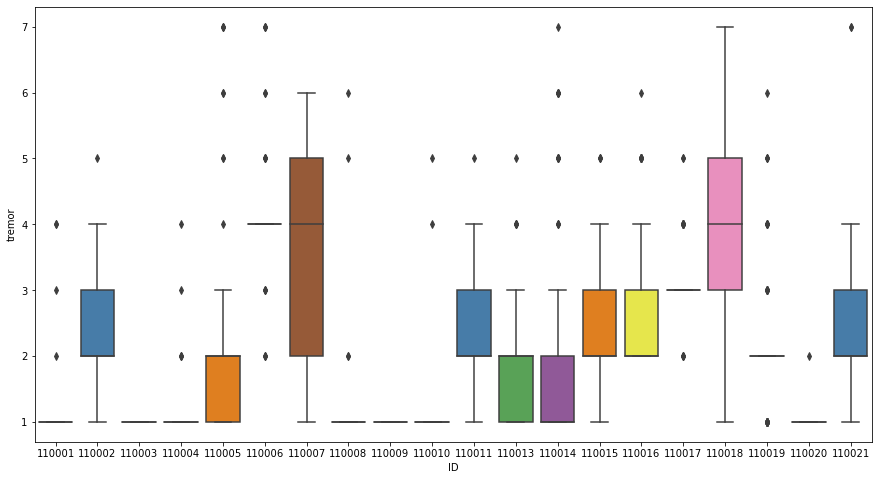

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x="ID", y="tremor", data=dataset, palette="Set1")
plt.show()

C:\Users\zubair\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zubair\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zubair\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zubair\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zubair\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.0% of the p

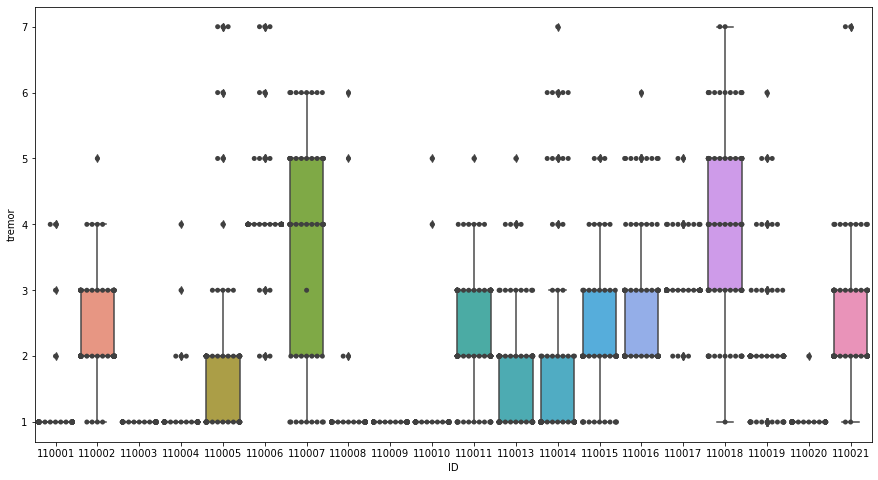

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x="ID", y="tremor", data=dataset)
sns.swarmplot(x="ID", y="tremor", data=dataset, color=".25")
plt.show()

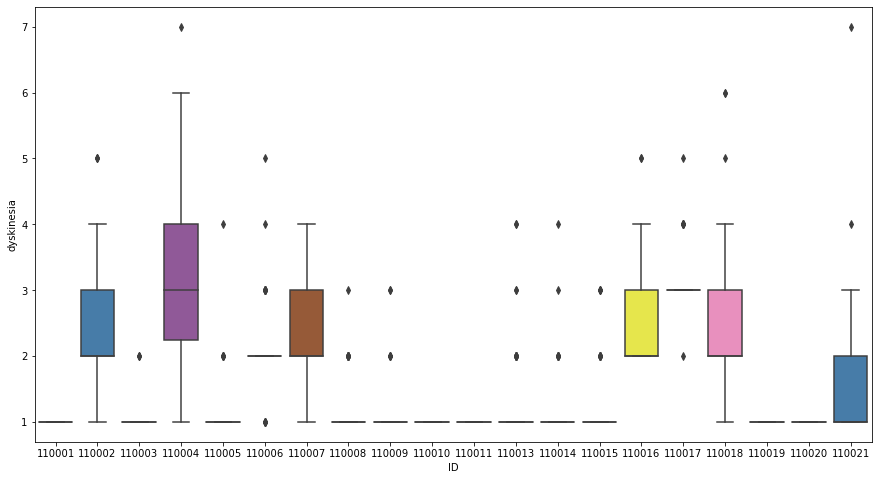

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x="ID", y="dyskinesia", data=dataset, palette="Set1")
plt.show()

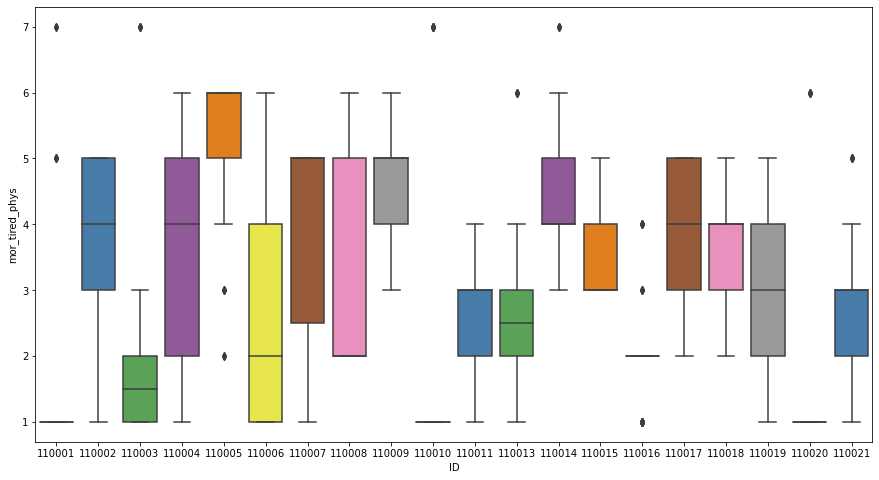

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x="ID", y="mor_tired_phys", data=dataset, palette="Set1")
plt.show()

In [13]:
smaler_dataset.groupby('ID').tremor.mean().sort_values(ascending=False)


ID
110006    4.102564
110018    3.986486
110007    3.773585
110017    3.103448
110016    2.800000
110021    2.541176
110011    2.340659
110002    2.281250
110015    2.245902
110019    2.215385
110005    2.068493
110014    1.852273
110013    1.829268
110008    1.180328
110001    1.116883
110004    1.102564
110010    1.090909
110020    1.010870
110009    1.000000
110003    1.000000
Name: tremor, dtype: float64

In [14]:
smaler_dataset.groupby('ID').dyskinesia.mean().sort_values(ascending=False)

ID
110004    3.435897
110017    3.080460
110002    2.500000
110016    2.437500
110018    2.378378
110007    2.226415
110006    2.102564
110021    1.517647
110015    1.278689
110013    1.256098
110008    1.229508
110014    1.159091
110009    1.145161
110005    1.123288
110003    1.040541
110019    1.000000
110020    1.000000
110001    1.000000
110010    1.000000
110011    1.000000
Name: dyskinesia, dtype: float64

In [7]:
smaler_dataset.groupby('ID').mor_tired_phys.mean()
smaler_dataset.groupby('ID').mor_tired_phys.mean().sort_values(ascending=False)

ID
110005    5.232877
110009    4.774194
110014    4.443182
110017    3.852273
110002    3.802083
110018    3.773333
110007    3.692308
110015    3.622951
110004    3.320513
110008    3.120690
110019    3.062500
110021    2.847059
110006    2.794872
110011    2.728261
110013    2.609756
110003    2.027027
110016    2.000000
110010    1.846154
110001    1.600000
110020    1.376344
Name: mor_tired_phys, dtype: float64

<AxesSubplot:xlabel='ID'>

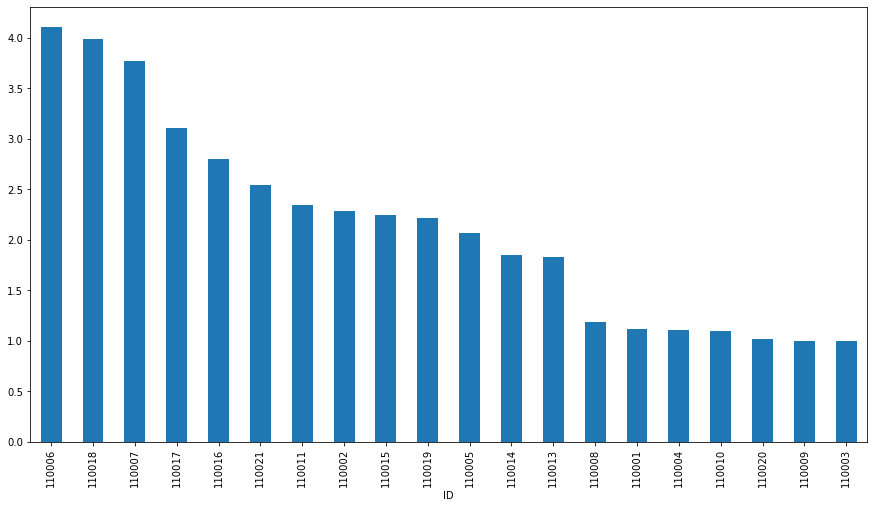

In [16]:
plt.figure(figsize=(15,8))
smaler_dataset.groupby('ID').tremor.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='ID'>

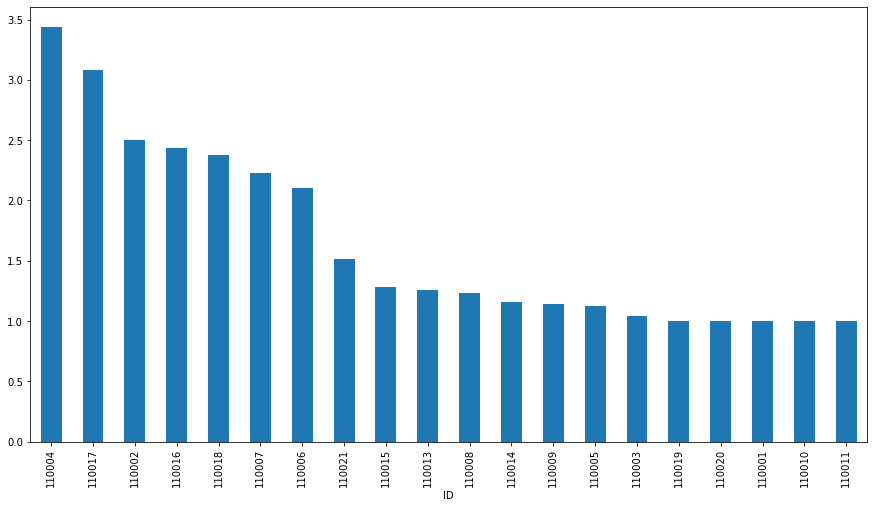

In [15]:
plt.figure(figsize=(15,8))
smaler_dataset.groupby('ID').dyskinesia.mean().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='ID'>

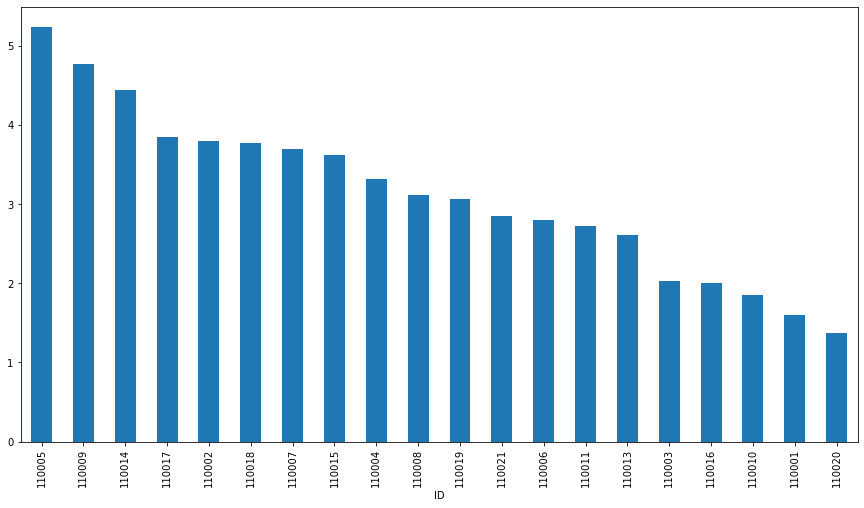

In [22]:
plt.figure(figsize=(15,8))
smaler_dataset.groupby('ID').mor_tired_phys.mean().sort_values(ascending=False).plot(kind='bar')

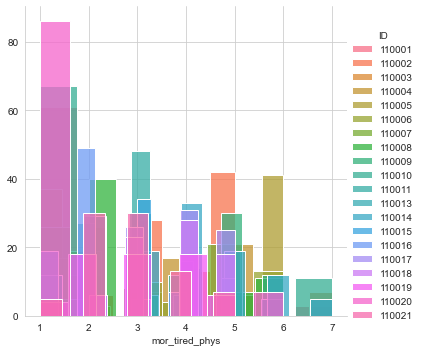

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(smaler_dataset, hue="ID", height=5).map(sns.histplot, "mor_tired_phys").add_legend()
plt.show()

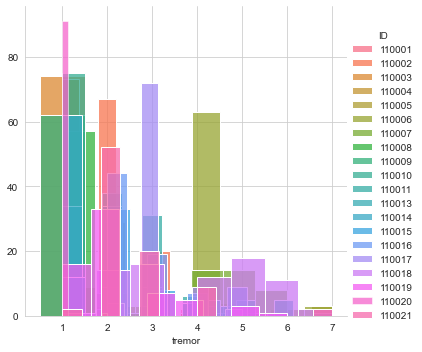

In [24]:
sns.set_style("whitegrid")
sns.FacetGrid(smaler_dataset, hue="ID", height=5).map(sns.histplot, "tremor").add_legend()
plt.show()

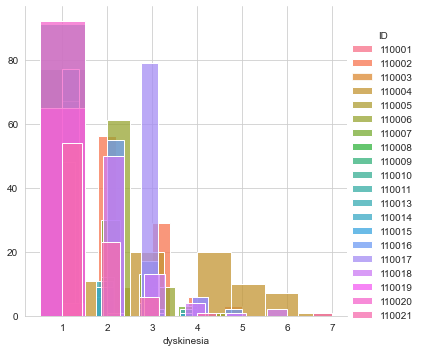

In [25]:

sns.set_style("whitegrid")
sns.FacetGrid(smaler_dataset, hue="ID", height=5).map(sns.histplot, "dyskinesia").add_legend()
plt.show()

In [26]:
smaler_dataset.describe()

,ID,tremor,dyskinesia,mor_tired_phys
count,1539.000000,1534.000000,1534.000000,1514.000000
mean,110011.087719,2.124511,1.661017,3.088507
std,6.321221,1.357067,0.988429,1.665747
min,110001.000000,1.000000,1.000000,1.000000
25%,110005.000000,1.000000,1.000000,2.000000
50%,110011.000000,2.000000,1.000000,3.000000
75%,110017.000000,3.000000,2.000000,4.000000
max,110021.000000,7.000000,7.000000,7.000000
